# Gradient Boosting and GridSearch

## The Data


<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("../data/mushrooms.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Prep

In [10]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True, dtype=int)
y = df['class']

In [11]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Train | Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Gradient Boosting and Grid Search with CV

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
gb_model = GradientBoostingClassifier()

In [18]:
param_grid = {"n_estimators": [1, 5, 10, 20, 40, 100], 'max_depth': [3, 4, 5, 6]}

In [19]:
grid = GridSearchCV(gb_model, param_grid)

### Fit to Training Data with CV Search

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [21]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

## Performance

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score

In [23]:
predictions = grid.predict(X_test)

In [24]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [26]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 3.34713677e-16, 0.00000000e+00, 0.00000000e+00,
       9.50714822e-17, 1.04524302e-03, 1.28987086e-17, 5.06011038e-06,
       9.37242661e-18, 1.24315794e-17, 7.37799256e-18, 0.00000000e+00,
       7.07229798e-18, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.31055039e-03, 5.70704658e-02, 6.24175887e-04, 1.74470169e-02,
       1.82499853e-02, 9.40913169e-06, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27126988e-02,
       1.03950811e-02, 0.00000000e+00, 1.32734486e-17, 0.00000000e+00,
       1.90822912e-17, 0.00000000e+00, 0.00000000e+00, 2.56257516e-17,
       1.15526441e-16, 0.00000000e+00, 3.47347104e-17, 0.00000000e+00,
       0.00000000e+00, 5.91554322e-04, 1.35970145e-01, 0.00000000e+00,
       3.68899011e-02, 4.47043435e-04, 7.70422757e-06, 5.48883507e-06,
       0.00000000e+00, 0.00000000e+00, 3.13507474e-02, 1.71678715e-03,
       0.00000000e+00, 0.00000000e+00, 9.01438738e-04, 0.00000000e+00,
      

In [27]:
feat_import = grid.best_estimator_.feature_importances_

In [28]:
imp_features = pd.DataFrame(index = X.columns, data=feat_import, columns=['Importance'])

In [29]:
imp_features

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,3.347137e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.507148e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.171702e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [30]:
imp_features.sort_values('Importance', ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.057070
stalk-root_r,0.036890
stalk-surface-below-ring_y,0.031351
...,...
gill-color_e,0.000000
veil-color_o,0.000000
gill-color_y,0.000000
gill-attachment_f,0.000000


In [31]:
imp_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064697,0.0,0.0,3.347137e-16,0.000298,0.614744


In [33]:
imp_feats = imp_features[imp_features['Importance'] > 0.000527]

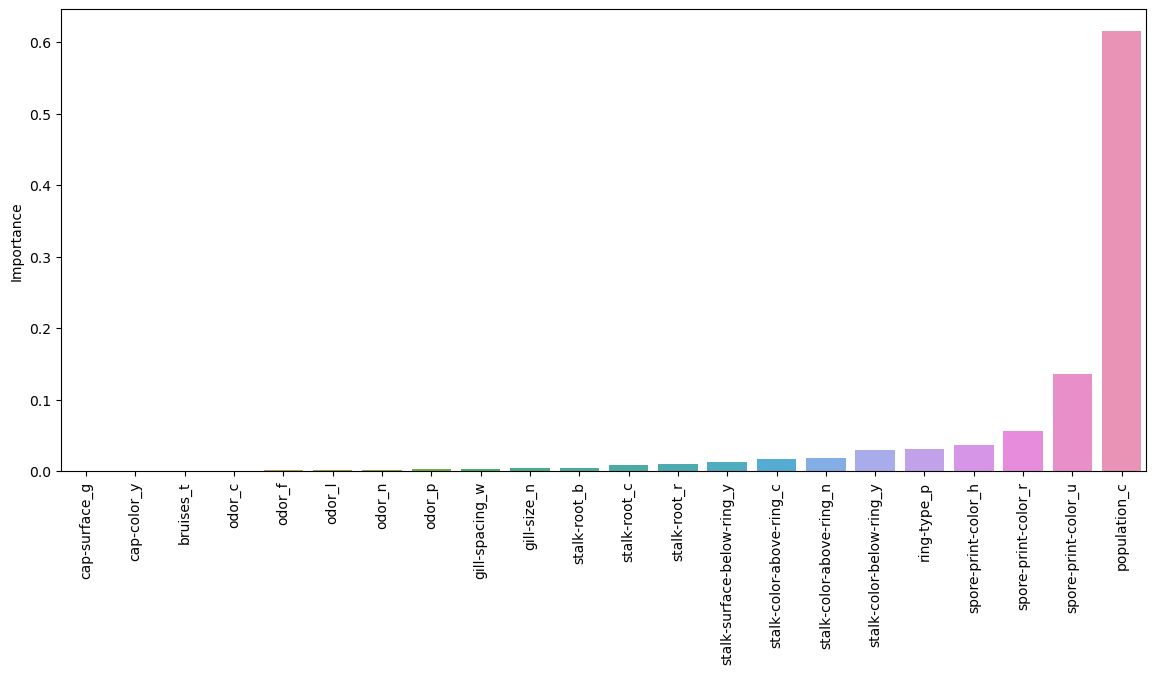

In [34]:
plt.figure(figsize=(14,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);